In [3]:
import sys
import sklearn

# Common imports
import numpy as np
import os

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

Saving figure first_digit_plot


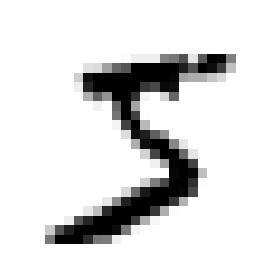

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

first_digit = X[0]
first_digit_image = first_digit.reshape(28, 28)
plt.imshow(first_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("first_digit_plot")
plt.show()

In [7]:
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary)
    plt.axis("off")

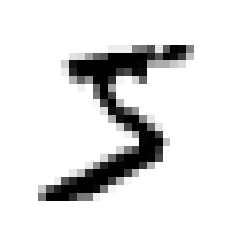

In [8]:
plot_digit(X[0])

In [9]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary classification: 5 or not 5

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [15]:
sgd_clf.predict([first_digit]),y_train_5[0]#correct prediction for the first digit

(array([ True]), True)

In [22]:
#evaluate performance
from sklearn.model_selection import cross_val_score,cross_val_predict

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96495, 0.96425, 0.96205])

In [23]:
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
correct_percentage=sum(y_train_pred==y_train_5)/len(y_train_pred)
correct_percentage

0.9644833333333334

In [24]:
#compare with a trivial prector: always returns false

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self, X):
        return np.zeros((X.shape[0],1), dtype=bool)

In [25]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") 
# comes to show that the result we got above is only sightly better than the naive result

array([0.91125, 0.90855, 0.90915])

In [26]:
from sklearn.metrics import confusion_matrix,f1_score

confusion_matrix(y_train_5, y_train_pred)#many false negatives

array([[54155,   424],
       [ 1707,  3714]])

In [27]:
f1_score(y_train_5, y_train_pred)#harmonic mean of precision and recall

0.7770687310388116

In [28]:
y_pred_first = sgd_clf.decision_function([first_digit])
y_pred_first,y_pred_first>0 #if decision function>0, then predict True

(array([2164.22030239]), array([ True]))

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores, y_scores>1 #if decision function>1, then predict True

(array([  1112.46971618, -18371.67592848, -33412.39103155, ...,
          8335.9713763 ,  -4704.03441346, -12500.08918871]),
 array([ True, False, False, ...,  True, False, False]))

In [30]:
#compute precision and recall for all values of the threshold
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

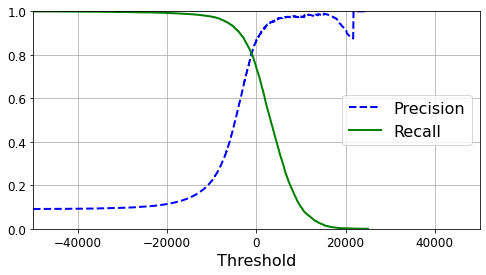

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

No handles with labels found to put in legend.


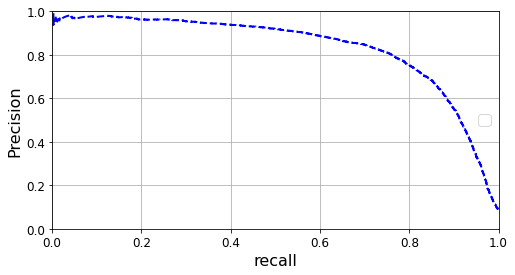

In [83]:
#plot precision Vs recall directly: precision-recall trade-off
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--",  linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.ylabel("Precision", fontsize=16)
    plt.xlabel("recall", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([0,1, 0, 1])             # Not shown


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_vs_recall(precisions, recalls)

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

No handles with labels found to put in legend.


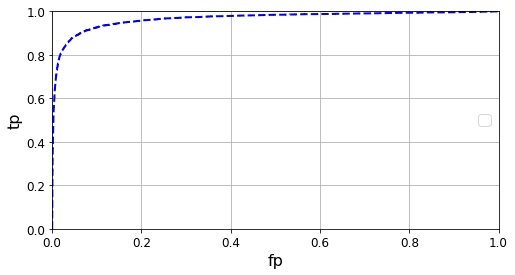

In [33]:
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, "b--",  linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.ylabel("tp", fontsize=16)
    plt.xlabel("fp", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([0,1, 0, 1])             # Not shown


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_roc(fpr, tpr)
plt.show()

In [34]:
#compute area under the curve: the bigger the better
from sklearn.metrics import roc_auc_score, precision_score

roc_auc_score(y_train_5, y_scores)

0.9671567364537266

In [40]:
#can improve the model by scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled,y_train_5, cv=3, scoring="accuracy")

array([0.97145, 0.9667 , 0.9677 ])

In [35]:
#Try a different classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [36]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

No handles with labels found to put in legend.


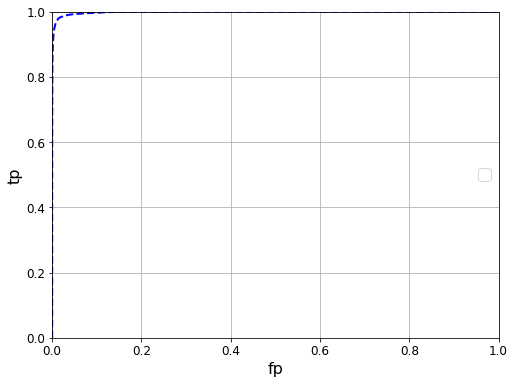

In [37]:
plt.figure(figsize=(8, 6))
plot_roc(fpr_forest, tpr_forest)

In [38]:
# much better than before
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [39]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

## Mutliclass classification

### Each instance is assigned to one class

In [67]:
from sklearn.svm import SVC

svm_clf=SVC()
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([first_digit])

array([5], dtype=uint8)

In [68]:
first_digit_score=svm_clf.decision_function([first_digit])
first_digit_score

array([[ 1.75828215,  2.74956232,  6.13809559,  8.2853702 , -0.28728967,
         9.30119996,  0.74228825,  3.79256174,  7.20847395,  4.85762716]])

In [71]:
#evaluate performance
#train only on 1000 instances... takes long otherwise
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred=cross_val_predict(svm_clf,X_train[:1000],y_train[:1000],cv=3)
conf_mx=confusion_matrix(y_train[:1000], y_train_pred)
conf_mx

array([[ 91,   0,   2,   0,   0,   2,   1,   0,   1,   0],
       [  0, 110,   1,   0,   0,   3,   0,   1,   1,   0],
       [  0,   4,  85,   1,   2,   2,   1,   2,   2,   0],
       [  1,   0,   3,  82,   0,   3,   1,   2,   1,   0],
       [  0,   0,   0,   0, 101,   1,   1,   0,   0,   2],
       [  0,   1,   1,   1,   1,  83,   2,   0,   1,   2],
       [  1,   3,   1,   0,   3,   2,  84,   0,   0,   0],
       [  0,   4,   1,   0,   2,   0,   0, 108,   0,   2],
       [  0,   3,   4,   3,   1,   4,   0,   0,  71,   1],
       [  2,   0,   1,   1,   9,   1,   0,   7,   1,  78]])

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3)
grid_search.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.829, total=   0.2s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.865, total=   0.2s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.862, total=   0.2s
[CV] n_neighbors=3, weights=distance .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ..... n_neighbors=3, weights=distance, score=0.829, total=   0.2s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.868, total=   0.2s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.871, total=   0.2s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.832, total=   0.2s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.868, total=   0.2s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.844, total=   0.2s
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.835, total=   0.2s
[CV] n_neighbors=4, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.4s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [73]:
grid_search.best_score_

0.8600246953540367

In [74]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [75]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.8737

## Mutlilabel classification

### Each instance is assigned to multiple classes

In [51]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large=y_train>=7
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([first_digit])#5 is not large, but it is odd

array([[False,  True]])

## Mutlioutput classification
### generalisation of Multilabel classification such that each label can have multiple classes

## Data Augmentation

In [55]:
from scipy.ndimage.interpolation import shift

In [56]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

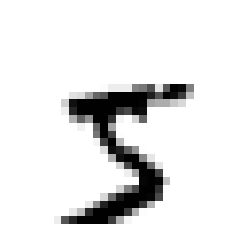

In [59]:
image = X_train[0]
shifted_image_down = shift_image(image, 0, 5)

plot_digit(shifted_image_down)

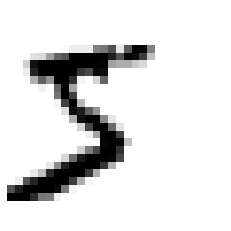

In [61]:
image = X_train[0]
shifted_image_left = shift_image(image, -5, 0)

plot_digit(shifted_image_left)

In [62]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)